In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd
%matplotlib inline
import torch

<ipython-input-1-bc0f13913ee4>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Linear regression without optimizer library

In [5]:
# f(x_1, x_2) = 2x_1 + x_2
#X = torch.tensor([[1, 2, 3, 4, 1], [1, 2, 3, 4, 2]], dtype=torch.float32)
#Y = torch.tensor([3, 6, 9, 12, 4], dtype=torch.float32)
X = torch.tensor([[1, 2, 3, 4], [1, 2, 3, 4]], dtype=torch.float32)
Y = torch.tensor([3, 6, 9, 12], dtype=torch.float32)
print(X.shape)

w = torch.tensor([[1.0,3.0]], dtype=torch.float32, requires_grad=True)
print(w.shape)
print(w.matmul(X))

# model output
def forward(x):
    #print(x.shape)
    return w.matmul(x)

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

test_point = torch.tensor([[5],[5]], dtype=torch.float32)
print(f'Prediction before training: f([[5],[5]]) = {forward(test_point)}')

# Training
learning_rate = 0.01
n_iters = 5000

for epoch in range(n_iters):
    # predict = forward pass
    #print(X.shape)
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()
    #print(w.grad)

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 100 == 0:
        print(f'epoch {epoch+1}: w = {w.tolist()}, loss = {l.item():.8f}')

print(f'Prediction after training: f([[5],[5]]) = {forward(test_point)}')

torch.Size([2, 4])
torch.Size([1, 2])
tensor([[ 4.,  8., 12., 16.]], grad_fn=<MmBackward0>)
Prediction before training: f([[5],[5]]) = tensor([[20.]], grad_fn=<MmBackward0>)
epoch 1: w = [[0.8500000238418579, 2.8499999046325684]], loss = 7.50000000
epoch 101: w = [[0.49999940395355225, 2.5000007152557373]], loss = 0.00000000
epoch 201: w = [[0.49999940395355225, 2.5000007152557373]], loss = 0.00000000
epoch 301: w = [[0.49999940395355225, 2.5000007152557373]], loss = 0.00000000
epoch 401: w = [[0.49999940395355225, 2.5000007152557373]], loss = 0.00000000
epoch 501: w = [[0.49999940395355225, 2.5000007152557373]], loss = 0.00000000
epoch 601: w = [[0.49999940395355225, 2.5000007152557373]], loss = 0.00000000
epoch 701: w = [[0.49999940395355225, 2.5000007152557373]], loss = 0.00000000
epoch 801: w = [[0.49999940395355225, 2.5000007152557373]], loss = 0.00000000
epoch 901: w = [[0.49999940395355225, 2.5000007152557373]], loss = 0.00000000
epoch 1001: w = [[0.49999940395355225, 2.50000071

Logistic regression without optimizer library

In [7]:
X = torch.tensor([[1, -2, 3, -4, 1], [2, 1, 5, 3.5, 2]], dtype=torch.float32)
Y = torch.tensor([1, 0, 1, 0, 1], dtype=torch.float32)
#X = torch.tensor([[1, 2, 3, 4, 1], [1, 2, 3, 4, 2]], dtype=torch.float32)
#Y = torch.tensor([3, 6, 9, 12, 4], dtype=torch.float32)
print(X.shape)

w = torch.tensor([[0.0,0.0]], dtype=torch.float32, requires_grad=True)
print(w.shape)
print(w.matmul(X))

# model output
def forward(x):
    #print(x.shape)
    #return torch.sign(w.matmul(x))
    return torch.sigmoid(w.matmul(x))

# loss = MSE
def loss(y, y_pred):
    #return ((y_pred - y)**2).mean()
    return (- y * torch.log(y_pred) - (1-y)*torch.log(1-y_pred)).mean()

test_point = torch.tensor([[5],[5]], dtype=torch.float32)
print(f'Prediction before training: f([[5],[6]]) = {forward(test_point)}')

# Training
learning_rate = 0.01
n_iters = 501

for epoch in range(n_iters):
    # predict = forward pass
    #print(X.shape)
    y_pred = forward(X)
    #print(f"predicted is {y_pred.tolist()}")

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()
    #print(f"grad is {w.grad.tolist()}")

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 100 == 0:
        print(f'epoch {epoch+1}: w = {w.tolist()}, loss = {l.item():.8f}')

print(f'Prediction before training: f([[5],[6]]) = {forward(test_point)}')

torch.Size([2, 5])
torch.Size([1, 2])
tensor([[0., 0., 0., 0., 0.]], grad_fn=<MmBackward0>)
Prediction before training: f([[5],[6]]) = tensor([[0.5000]], grad_fn=<SigmoidBackward0>)
epoch 1: w = [[0.010999999940395355, 0.004500000271946192]], loss = 0.69314718
epoch 101: w = [[0.6186423897743225, 0.2019696980714798]], loss = 0.22770432
epoch 201: w = [[0.8937491774559021, 0.29309341311454773]], loss = 0.14123885
epoch 301: w = [[1.0753391981124878, 0.360596239566803]], loss = 0.10319865
epoch 401: w = [[1.2119961977005005, 0.41463789343833923]], loss = 0.08142221
epoch 501: w = [[1.3218669891357422, 0.45960018038749695]], loss = 0.06724522
Prediction before training: f([[5],[6]]) = tensor([[0.9999]], grad_fn=<SigmoidBackward0>)


Linear regression with optimizer library

In [8]:
import torch.nn as nn
#X = torch.tensor([[1, -2, 3, -4, 1], [2, 1, 5, 3.5, 2]], dtype=torch.float32)
#Y = torch.tensor([1, 0, 1, 0, 1], dtype=torch.float32)

# 2x_1 + x_2
X = torch.tensor([[1, 2, 3, 4, 1], [1, 2, 3, 4, 2]], dtype=torch.float32)
Y = torch.tensor([3, 6, 9, 12, 4], dtype=torch.float32)
Y = Y.unsqueeze(1)

print(X.shape)
X.transpose_(0,1)
#X.transpose(0,1)
print(X.shape)
print(Y.shape)

n_samples, n_features = X.shape

# Model, the model has to implement the forward pass!
# We use a built-in model from PyTorch
input_size = n_features
output_size = 1

# we can call this model with samples X
model = nn.Linear(input_size, output_size,bias=True)

'''
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)
'''
X_test = torch.tensor([5,6], dtype=torch.float32)
print(X_test.shape)
print(f'Prediction before training: f(5) = {model(X_test).detach().tolist()}')

# Define loss and optimizer
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_iters = 10000
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 1000 == 0:
        [w,b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w.tolist(), 'b = ', b.item() ,'loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).detach().tolist()}')
print(f'Prediction after training: f(5) = {model(X).tolist()}')

torch.Size([2, 5])
torch.Size([5, 2])
torch.Size([5, 1])
torch.Size([2])
Prediction before training: f(5) = [3.575774908065796]
epoch  1 : w =  [[0.26414039731025696, 0.8674482107162476]] b =  0.43517979979515076 loss =  tensor(34.5679, grad_fn=<MseLossBackward0>)
epoch  1001 : w =  [[1.8770465850830078, 1.1458687782287598]] b =  -0.08172059804201126 loss =  tensor(0.0025, grad_fn=<MseLossBackward0>)
epoch  2001 : w =  [[1.9638707637786865, 1.045432209968567]] b =  -0.03129604458808899 loss =  tensor(0.0002, grad_fn=<MseLossBackward0>)
epoch  3001 : w =  [[1.9885153770446777, 1.0144882202148438]] b =  -0.010080010630190372 loss =  tensor(2.5355e-05, grad_fn=<MseLossBackward0>)
epoch  4001 : w =  [[1.9963303804397583, 1.0046294927597046]] b =  -0.003221407299861312 loss =  tensor(2.5889e-06, grad_fn=<MseLossBackward0>)
epoch  5001 : w =  [[1.998826265335083, 1.0014808177947998]] b =  -0.001030458603054285 loss =  tensor(2.6486e-07, grad_fn=<MseLossBackward0>)
epoch  6001 : w =  [[1.9996

Logistic regression with optimizer library

In [9]:
import torch.nn as nn
X = torch.tensor([[1, -2, 3, -4, 1], [2, 1, 5, 3.5, 2]], dtype=torch.float32)
Y = torch.tensor([1, 0, 1, 0, 1], dtype=torch.float32)

# 2x_1 + x_2
#X = torch.tensor([[1, 2, 3, 4, 1], [1, 2, 3, 4, 2]], dtype=torch.float32)
#Y = torch.tensor([3, 6, 9, 12, 4], dtype=torch.float32)
Y = Y.unsqueeze(1)

print(X.shape)
X.transpose_(0,1)
#X.transpose(0,1)
print(X.shape)
print(Y.shape)

n_samples, n_features = X.shape

# Model, the model has to implement the forward pass!
# We use a built-in model from PyTorch
input_size = n_features
output_size = 1

# we can call this model with samples X
#model = nn.Linear(input_size, output_size,bias=True)


class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        # define diferent layers
        self.linear = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.linear(x)
        return self.sigmoid(x)
model = LogisticRegression(input_size, output_size)

X_test = torch.tensor([5,6], dtype=torch.float32)
print(X_test.shape)
print(f'Prediction before training: f(5) = {model(X_test).detach().tolist()}')

# Define loss and optimizer
learning_rate = 0.01

loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_iters = 10000
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(y_predicted,Y)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 1000 == 0:
        [w,b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w.tolist(), 'b = ', b.item() ,'loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).detach().tolist()}')
print(f'Prediction after training: f(5) = {model(X).tolist()}')

torch.Size([2, 5])
torch.Size([5, 2])
torch.Size([5, 1])
torch.Size([2])
Prediction before training: f(5) = [0.0019914982840418816]
epoch  1 : w =  [[-0.47920048236846924, -0.5865569710731506]] b =  -0.14663797616958618 loss =  tensor(2.0011, grad_fn=<BinaryCrossEntropyBackward0>)
epoch  1001 : w =  [[1.6675034761428833, 0.5418604016304016]] b =  0.1685972809791565 loss =  tensor(0.0371, grad_fn=<BinaryCrossEntropyBackward0>)
epoch  2001 : w =  [[2.058037281036377, 0.6875313520431519]] b =  0.19987283647060394 loss =  tensor(0.0189, grad_fn=<BinaryCrossEntropyBackward0>)
epoch  3001 : w =  [[2.289850950241089, 0.7727974057197571]] b =  0.21458850800991058 loss =  tensor(0.0127, grad_fn=<BinaryCrossEntropyBackward0>)
epoch  4001 : w =  [[2.45546293258667, 0.8330627679824829]] b =  0.22351092100143433 loss =  tensor(0.0096, grad_fn=<BinaryCrossEntropyBackward0>)
epoch  5001 : w =  [[2.5844743251800537, 0.8796358108520508]] b =  0.22962985932826996 loss =  tensor(0.0077, grad_fn=<BinaryCr

In [ ]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
Temp = X

torch.Size([2])
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>


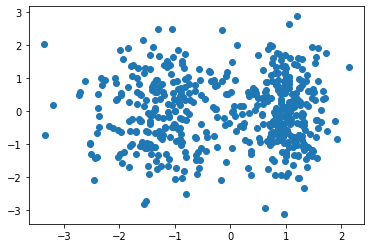

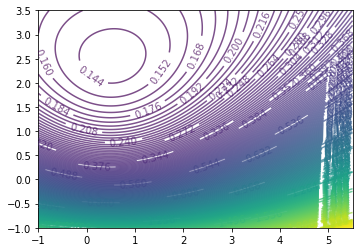

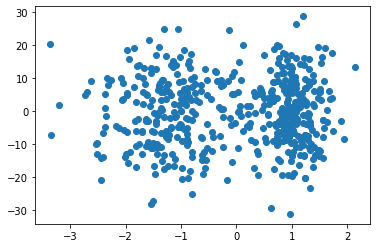

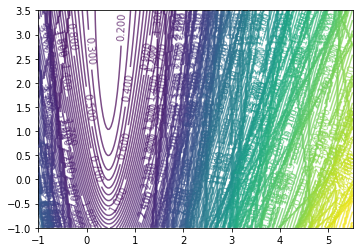

In [ ]:
#from torch._C import float32
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd
%matplotlib inline
import torch
import torch.nn as nn

X = Temp
#X = torch.tensor([[1, -2, 3, -4, 1], [2, 1, 5, 3.5, 2]], dtype=torch.float32)
#Y = torch.tensor([1, 0, 1, 0, 1], dtype=torch.float32)

# 2x_1 + x_2
#X = torch.tensor([[1, 2, 3, 4, 1], [1, 2, 3, 4, 2]], dtype=torch.float32)
#Y = torch.tensor([3, 6, 9, 12, 4], dtype=torch.float32)
#Y = Y.unsqueeze(1)

#print(X.shape)
#X.transpose_(0,1)
#X.transpose(0,1)
#print(X.shape)
#print(Y.shape)

n_samples, n_features = X.shape

# Model, the model has to implement the forward pass!
# We use a built-in model from PyTorch
input_size = n_features
output_size = 1

# we can call this model with samples X
#model = nn.Linear(input_size, output_size,bias=True)


X = X.astype(np.float32)
Y = Y.astype(np.float32)
#print(X)


class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        # define diferent layers
        self.linear = nn.Linear(input_dim, output_dim, bias=False)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.linear(x)
        return self.sigmoid(x)
model = LogisticRegression(input_size, output_size)

X_test = torch.tensor([5,6], dtype=torch.float32)
print(X_test.shape)
#print(f'Prediction before training: f(5) = {model(X_test).detach().tolist()}')

# Define loss and optimizer
learning_rate = 0.01

loss = nn.BCELoss()

w0 = np.linspace(-1, 5.5, 200)
w1 = np.linspace(-1, 3.5, 200)
loss_vals = np.zeros(shape=(w0.size, w1.size))

print(type(model.linear.weight))
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        #print(value1)
        model.linear.weight = torch.nn.parameter.Parameter(torch.from_numpy(np.array([value1,value2], dtype=np.float32)))
        #print(model.weight)
        y_predicted = model(torch.from_numpy(X))

        # loss
        l = loss(y_predicted,torch.from_numpy(Y))
        loss_vals[i, j] = l.item()
        #print(l)
fig2, ax2 = plt.subplots()
ax2.scatter(X[:,0], X[:,1])
fig2, ax2 = plt.subplots()
CS2 = ax2.contour(w0, w1, loss_vals, 300, alpha=.7)
ax2.clabel(CS2, CS2.levels)
plt.gca().set_aspect("equal")


w0 = np.linspace(-1, 5.5, 200)
w1 = np.linspace(-1, 3.5, 200)
loss_vals = np.zeros(shape=(w0.size, w1.size))

X[:,1] *= 10
fig2, ax2 = plt.subplots()
ax2.scatter(X[:,0], X[:,1])
print(type(model.linear.weight))
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        #print(value1)
        model.linear.weight = torch.nn.parameter.Parameter(torch.from_numpy(np.array([value1,value2], dtype=np.float32)))
        #print(model.weight)
        y_predicted = model(torch.from_numpy(X))

        # loss
        l = loss(y_predicted,torch.from_numpy(Y))
        loss_vals[i, j] = l.item()
        #print(l)
fig2, ax2 = plt.subplots()
CS2 = ax2.contour(w0, w1, loss_vals, 300, alpha=.7)
ax2.clabel(CS2, CS2.levels)
plt.gca().set_aspect("equal")